## **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

## 3. Interpolation and Blending

 Importing necessary libraries/modules and functions

In [1]:
% matplotlib inline
% pprint off


# Import the library as show images, plot, etc.
import matplotlib.pyplot as plt
# Import functionality for the color map
import matplotlib.cm as cm

# Import system specific parameters and function
import sys 

## Other plotting libraries
# import seaborn as sns

# Import the library to mange the matrix and array 
import numpy as np

# Importing image processing toolbox 
## Module to read, write,... 
from skimage import io
## Module to convert the image on 8 bits
from skimage import img_as_ubyte
## Module to convert the image to float
from skimage import img_as_float
## Module for color conversion 
from skimage import color
## Module image transform from skimage for resize 
from skimage import transform
## Module misc from scipy for resize 
from scipy import misc
## Module util from skimage 
from PIL import Image


Pretty printing has been turned OFF


### 3.1  Resizing an image size using different interpolation functions

** Q.1 Resize the `lena` or `vibot` image using nearest, bilinear and bicubic function.** 

You can define your function which accept the model and resize size from the user or just run a script.

In [2]:
img_path='./images/'
img_name='lena-grey.bmp'
lena=io.imread(img_path.__add__(img_name),as_grey=True)

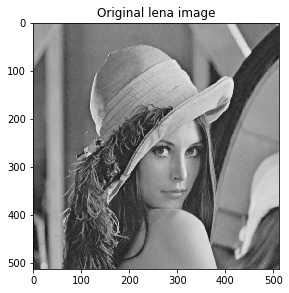

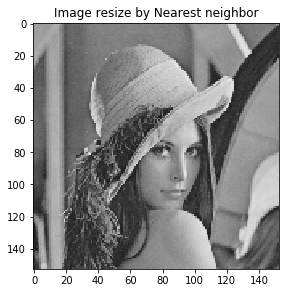

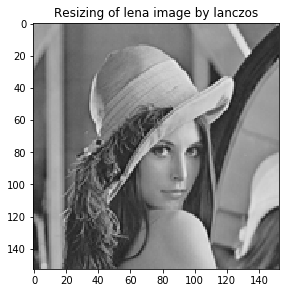

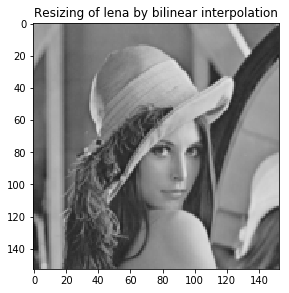

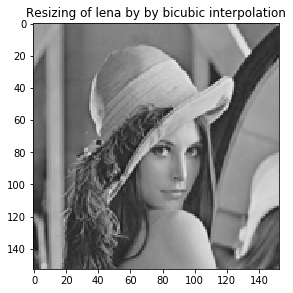

Text(0.5,1,'Resizing of lena by by cubic interpolation')

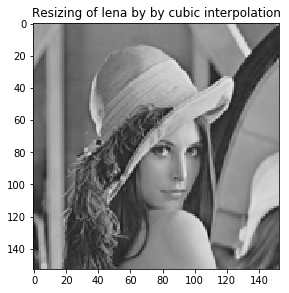

In [3]:
#figure, axes = plt.subplots(6,1,figsize=(20,20))
#axes=axes.ravel()
io.imshow(lena)
plt.title('Original lena image')

lena_re_ne = misc.imresize(lena,30,interp='nearest')
plt.show()
io.imshow(lena_re_ne)
plt.title("Image resize by Nearest neighbor")

lena_re_lan = misc.imresize(lena,30,interp="lanczos")
plt.show()
io.imshow(lena_re_lan)
plt.title("Resizing of lena image by lanczos")

lena_re_bil = misc.imresize(lena,30,interp="bilinear")
plt.show()
io.imshow(lena_re_bil)
plt.title("Resizing of lena by bilinear interpolation")

lena_re_bcub = misc.imresize(lena,30,interp="bicubic")
plt.show()
io.imshow(lena_re_bcub)
plt.title("Resizing of lena by by bicubic interpolation")

lena_re_cub = misc.imresize(lena,30,interp="cubic")
plt.show()
io.imshow(lena_re_cub)
plt.title("Resizing of lena by by cubic interpolation")

**Q.2 Write three functions that performs `simple_blend`, `alpha_blend` and `pyramid_blend`**

** Using your functions, blend `orange` and `apple` images together.**


In [11]:
def simple_blend(image1,image2):
    mask=np.zeros(image1.shape)
    mask[:,0:image1.shape[1]//2]=1.0
    counter_mask=(1-mask)
    new_img1=mask*image1
    new_img2=counter_mask*image2
    result=new_img1+new_img2
    
    return result

In [17]:
def alpha_blend(image1,image2,window):
    rows,col=image1.shape
    
    img_blend=np.zeros(image1.shape)
    img_blend[:, :int(col/2)-window] = image1[:, :int(col/2)-window]
    img_blend[:, int(col/2)+window:] = image2[:, int(col/2)+window:]
    
    x1 = np.ceil(col/2)-window
    x2 = np.ceil(col/2)+window
    x = np.arange(int(x1),int(x2))
    alpha = x/(x1-x2)-x2/(x1-x2)
    img_blend[:, x] = alpha*image1[:, x] + (1-alpha)*image2[:, x]
    
    return img_blend

In [78]:
def pyramid_blending(image1, image2):
    
    blended_image = np.zeros(image1.shape)
    mask = np.zeros(image1.shape)
    mask[:, 0:image1.shape[1]//2]=1.0
    
    #Creation of the Gaussian pyramid for image1 and image2
    image1_gauss = list(transform.pyramid_gaussian(image1, downscale=2))
    image2_gauss = list(transform.pyramid_gaussian(image2, downscale=2))
        
    #Gaussiang pyramid of the mask
    mask_gauss = list(transform.pyramid_gaussian(mask, downscale=2))
    
    image1_laplac = list()
    image2_laplac = list()
    
    #Creation of the laplacian pyramid
    for i in range(len(image1_gauss)):
        if i == len(image1_gauss)-1:
            image1_laplac.append(image1_gauss[i])
            image2_laplac.append(image2_gauss[i])
        else:
            image1_laplac.append(image1_gauss[i] - transform.resize(image1_gauss[i+1], image1_gauss[i].shape))
            image2_laplac.append(image2_gauss[i] - transform.resize(image2_gauss[i+1], image2_gauss[i].shape))
    
    #Blending the images
    laplacian_blended_pyramid = list()
    for i in range(len(image1_laplac)):
        laplacian_blended_pyramid.append(image1_laplac[i]*mask_gauss[i] + image2_laplac[i]*(1-mask_gauss[i]))

    #Collapsing of the pyramid
    for i in range(len(laplacian_blended_pyramid)):
        blended_image += transform.resize(laplacian_blended_pyramid[i], blended_image.shape)
    
    return blended_image
    

90000
(300, 300)
float64
90000
(300, 300)
float64


/home/wayo/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


Text(0.5,1,'Simple blending of apple and orange images')

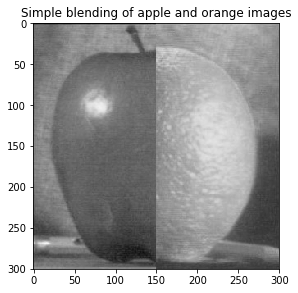

In [79]:
img_path1="./images/"
img_name1="apple.jpeg"
apple=io.imread(img_path1.__add__(img_name1),as_grey=True)

img_path2="./images/"
img_name2="orange.jpeg"
orange=io.imread(img_path2.__add__(img_name2),as_grey=True)

print(apple.size)
print(apple.shape)
print(apple.dtype)

print(orange.size)
print(orange.shape)
print(orange.dtype)

from skimage import img_as_ubyte
apple_ubyte=img_as_ubyte(apple)
orange_ubyte=img_as_ubyte(orange)

apronge=simple_blend(apple,orange)
io.imshow(apronge)
plt.title('Simple blending of apple and orange images')

Text(0.5,1,'Alpha blending of apple and orange images')

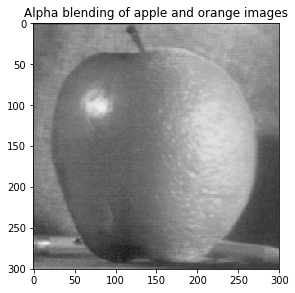

In [80]:
alpha = alpha_blend(apple,orange, 40)
plt.show()
io.imshow(alpha)
plt.title('Alpha blending of apple and orange images')

/home/wayo/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/wayo/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


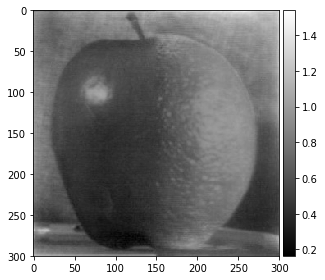

In [81]:
apronge_pyramid=pyramid_blending(apple,orange)
io.imshow(apronge_pyramid,cmap=cm.gray)